# Classification-Project (Predicting Customer Churn)

## **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading/Reading the dataset**

In [2]:
df= pd.read_csv('Data/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## **Exploring the dataset**

In [3]:
df.shape

(7043, 21)

In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Cleaning of Data**

In [6]:
# Replace all missing string values with 0
df.TotalCharges = df.TotalCharges.replace(" ", 0)
# Change totalcharges type from string to float
df.TotalCharges = df.TotalCharges.astype('float32')

## **Data Types**

The data consist of 7043 rows and 21 columns. Each row represent the data of a unique customer. We have one target column(Churn) and the remaining 20 columns have 19 columns with relevant features and one column containing customer ID
#### **Target:**
- Churn (binary)

#### **Nominal Features:**
- Tenure
- MonthlyCharges
- TotalCharges
    
#### **Categorical Features:**
- Gender
- SeniorCitizen
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod


## **Data Evaluation**

### **General EDA**

### Q.1 What is the percentage of Churned Customers?

C:\Users\RYZEN 5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


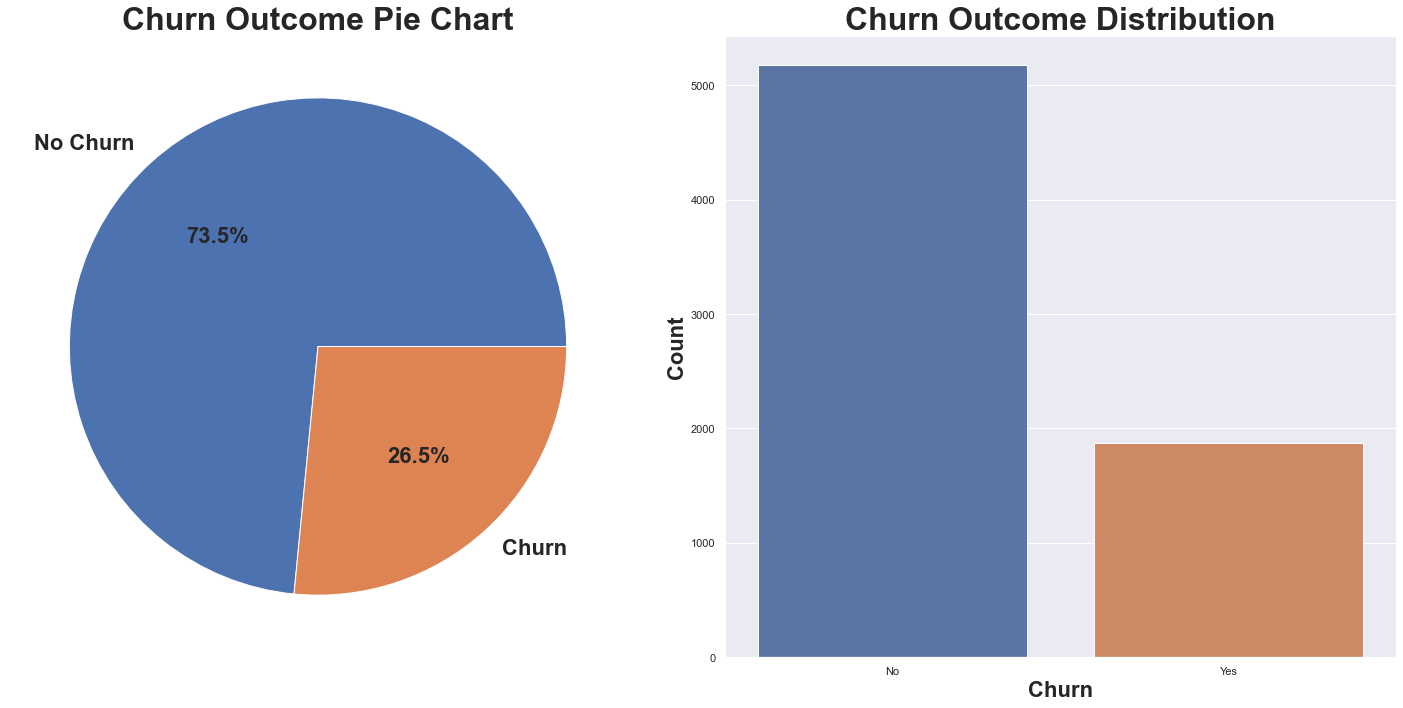

In [33]:
sns.set_context('notebook', font_scale = 2)
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.pie(df.Churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={
    'fontsize': 22, 'fontweight': 'bold'})
plt.title('Churn Outcome Pie Chart', fontsize = 32, fontweight = 'bold')
plt.subplot(122)
graph = sns.countplot(df.Churn)
graph.set_xlabel('Churn', fontweight = 'bold', fontsize = 22)
graph.set_ylabel('Count', fontweight = 'bold', fontsize = 22)
plt.title('Churn Outcome Distribution', fontsize = 32, fontweight = 'bold')
plt.tight_layout()

### **Numerical Feature EDA**

In [17]:
def tenure_groupings(df):
    if df.tenure <= 12:
        return "less_than_1yr"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2yr"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3yr"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4yr"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5yr"
    else:
        return "greater_than_5yr"

def tenure_group_churn(df):
    plt.figure(figsize = (15,10))
    graph = sns.countplot(data = df, x = 'tenure_group', hue = 'Churn', order = [
        'less_than_1yr', 'less_than_2yr', 'less_than_3yr', 'less_than_4yr', 'less_than_5yr', 'greater_than_5yr'])
    graph.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    graph.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    graph.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    graph.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()
    
def plt_numerical_averages(df, feature):
    fig = plt.figure(figsize = (15, 10))
    graph = sns.barplot(data = df, x = 'tenure_group', y = feature, hue = 'Churn', order = [
        'less_than_1yr', 'less_than_2yr', 'less_than_3yr', 'less_than_4yr', 'less_than_5yr', 'greater_than_5yr'])
    graph.set_xlabel('Tenure Groups', fontweight = 'bold', fontsize = 20)
    graph.set_ylabel(f'{feature} ($)', fontsize = 20, fontweight = 'bold')
    graph.set_title(f'Average {feature} by Tenure Group(Churn vs No Churn)', fontsize = 30, fontweight = 'bold')
    graph.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()
    
    

### Q.2 What is the trend of Customer Churning by Tenure/years spent with company?

In [9]:
df['tenure_group'] = df.apply(lambda df: tenure_groupings(df), axis = 1)

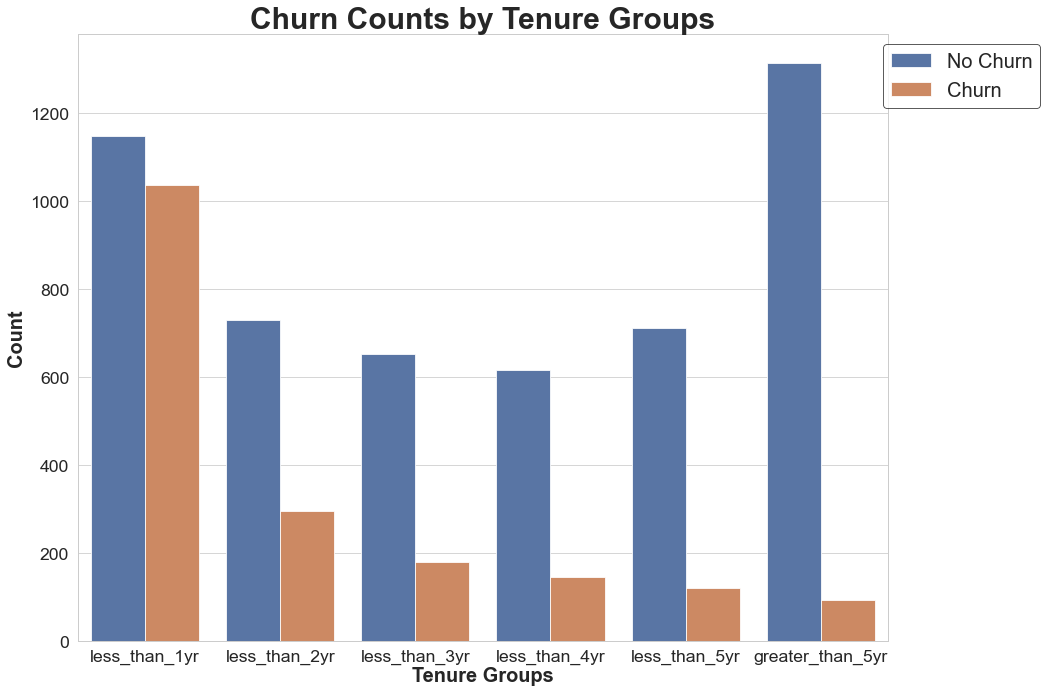

In [10]:
tenure_group_churn(df)

### Q.2 Visualisation of average monthly charges by Tenure group of Customers (Churn vs No Churn)

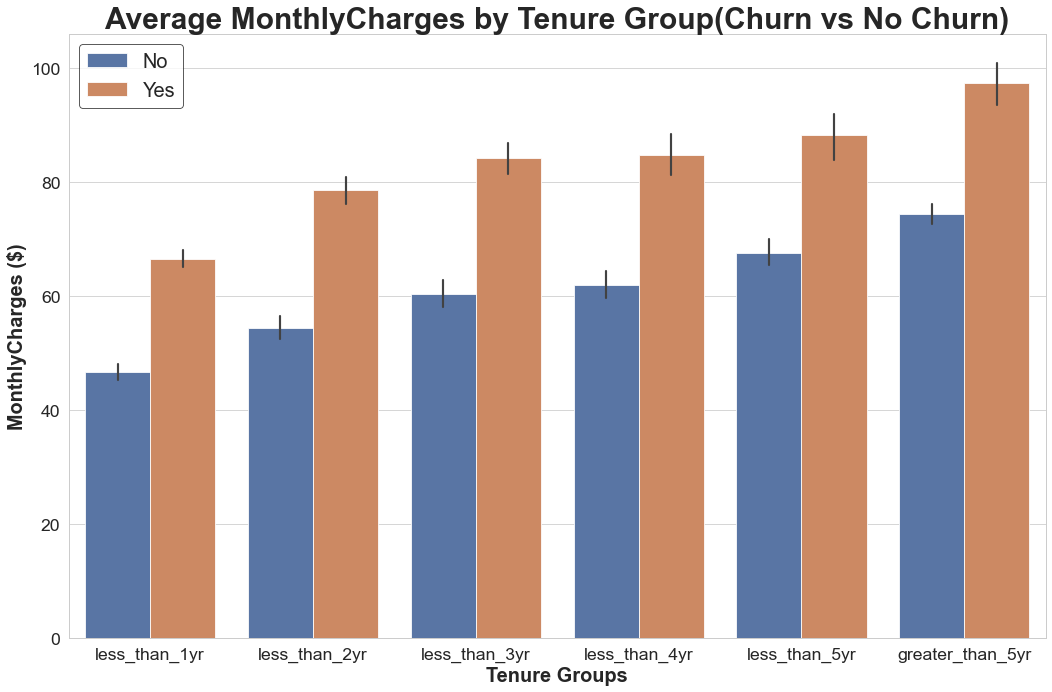

In [18]:
plt_numerical_averages(df, 'MonthlyCharges')

### Q.3 Visualisation of average Total charges by Tenure group of Customers (Churn vs No Churn)

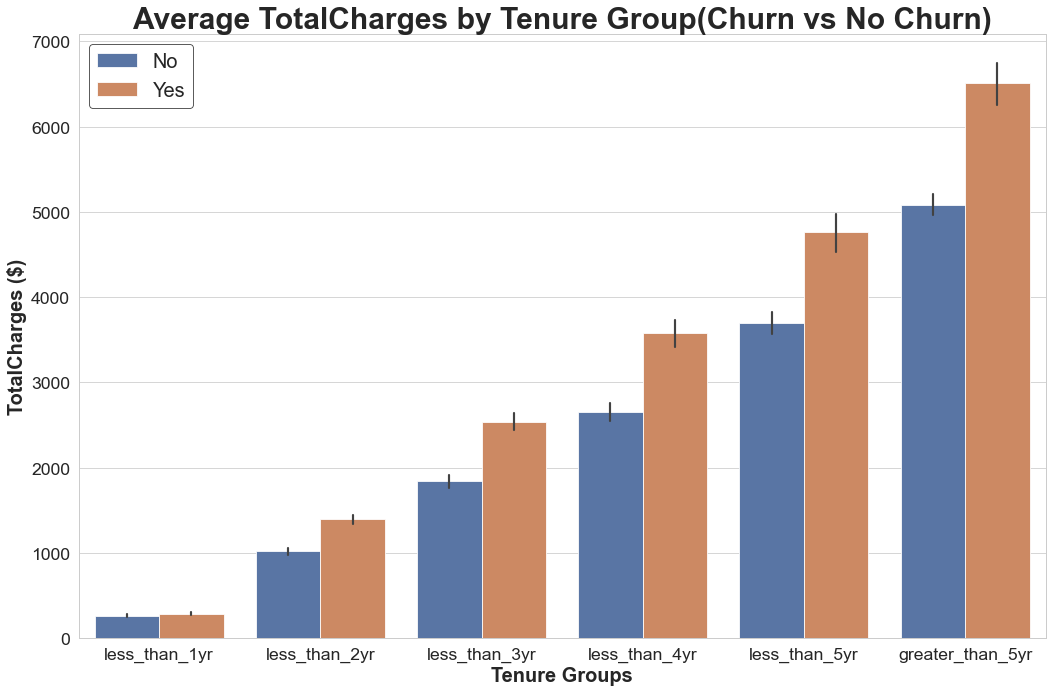

In [19]:
plt_numerical_averages(df, 'TotalCharges')

### Are most Senior citizens leavng the company?

In [14]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [15]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less_than_1yr
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,less_than_3yr
